# Recitation 4: Steady-State Error

## Objective
1. Compute the response to an arbitrary input
2. Compute the steady state error

## Python Control System Toolbox
The [python-control package](https://python-control.readthedocs.io/en/0.8.3/intro.html) is a set of python classes and functions that implement common operations for the analysis and design of feedback control systems. 
Through out the remainder of this course, we will utilize various commands from the control system toolbox.

Unfortunatley, the python-control package is not installed at GW jupyterhub. Currently, GW Instructional Technology Lab is checking if it can be installed easily. Meanwhile, we have to install it at every session of jupyterhub by executing

In [ ]:
pip install control

If you don't want to execute the above command every time, you may consier installing your own Python and the python-control package at your local computer, instead of using GW jupyterhub. 
* Install Anacona https://docs.anaconda.com/anaconda/install/
* Install control package https://python-control.readthedocs.io/en/0.8.3/intro.html

From now on, it is assumed that you have access to the python-control package.

## Time domain simulation

In class, we discussed computing the impulse response and the step response using
* [`t, y = control.impulse_response(sys, T)`](https://python-control.readthedocs.io/en/latest/generated/control.impulse_response.html)
* [`t, y = control.step_response(sys, T)`](https://python-control.readthedocs.io/en/latest/generated/control.step_response.html)

The system response to **an aribrary input** can be computed by

* [`t, y = control.forced_response(sys, T, U)`](https://python-control.readthedocs.io/en/latest/generated/control.forced_response.html)

where
* `T`: array defining the time step at which the input is defined
* `U`: input array giving the input at each time of `T`

## Example
For example, consider 

![](http://ctms.engin.umich.edu/CTMS/Content/Introduction/Control/PID/figures/feedback_block.png)

where
$C(s) = K$ and $P(s) = \dfrac{1}{s(s+1)}$.

Suppose $K=1$. 

In the previous recitation, we computed the step response with the following commmands:

In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt

K=1
sysC = K
sysP = control.tf(1,[1, 1, 0])
sys_forward = control.series(sysC,sysP)
sysYR = control.feedback(sys_forward,1)

t = np.linspace(0,10,501)
t, y = control.step_response(sysYR,t)
plt.plot(t,y)

Suppose that the reference input is given by
$$r(t) = \sin(t)$$

The corresponding output is comptued by

In [ ]:
t = np.linspace(0,20,501)
r = np.sin(t)
t, y = control.forced_response(sysYR,t,r)
plt.plot(t,y)

## Task

Consider the following satellite attitude control system:

<!-- <img src="http://fdcl.seas.gwu.edu/blk_satellite_ctl.png" width="600"> -->
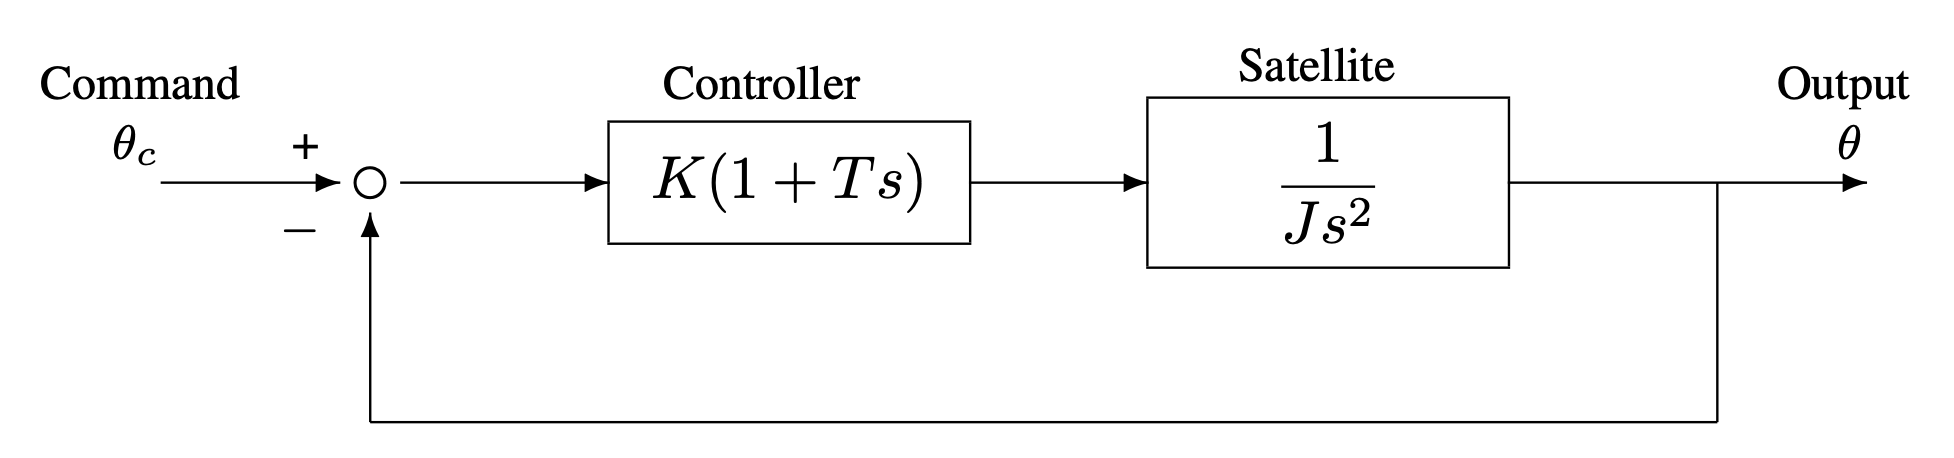

Suppose $J=1\mathrm{kgm^2}, K=2, T=1$. 
Note that this is a type 2 system, and the steady state error to a ramp input is zero. 

We will check this with numerical simluation as follows.  

Let the reference input be by $r(t) = t$. Compute and plot the error $e(t) = r(t)-y(t)$ for $0\leq t \leq 20$, and verify that the steady state error is zero.

In [ ]:
J, K, T =1, 2, 1


